# EDA to Prediction (DieTianic)
- 데이터: [Kaggle의 Titanic](https://www.kaggle.com/c/titanic)
- 필사 참조: [EDA To Prediction(DieTanic)](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook)

<br/>

**idea how is the workflow in any predictive modeling problem**
- 모델링에 더 초점을 맞춘 커널

1. EDA
2. Feature Engineering & Data Cleaning
3. Predictive Modeling

***

## 1. EDA (Exploratory Data Analysis)

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
data = pd.read_csv('./data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> `Age`, `Cabin`, `Embarked`

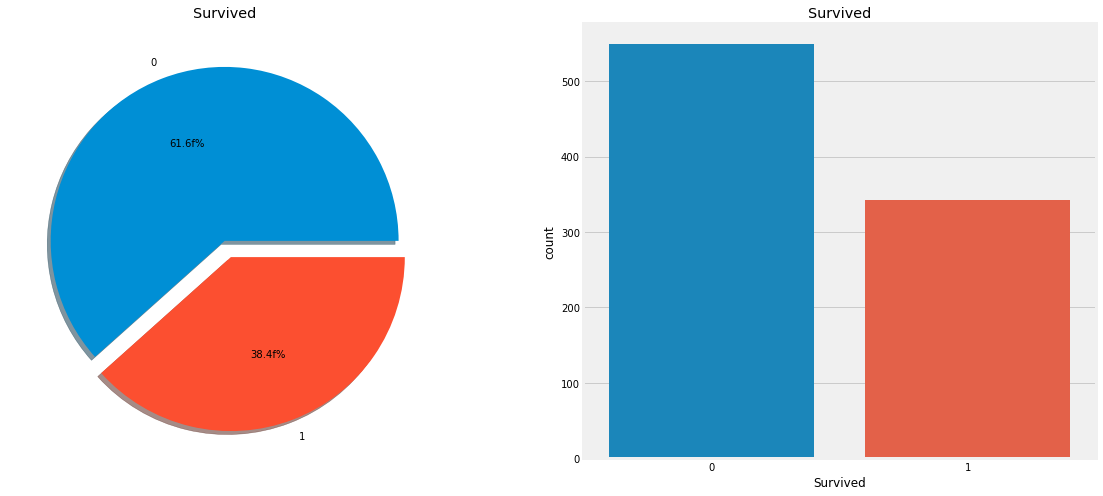

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                         autopct='%1.1ff%%',
                                         ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

> 생존 o: 38.41% -> 꽤나 `balanced data`
> - 각 feature에 따른 생존률을 확인하기 전 데이터 타입부터 이해하기

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Types of Features
#### Categorical Features
- Sex, Embarked

#### Ordinal Features
- Pclass

#### Continous Feature
- Age

### 1.1 Analysing the Features
### Sex (Categorical)

In [11]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

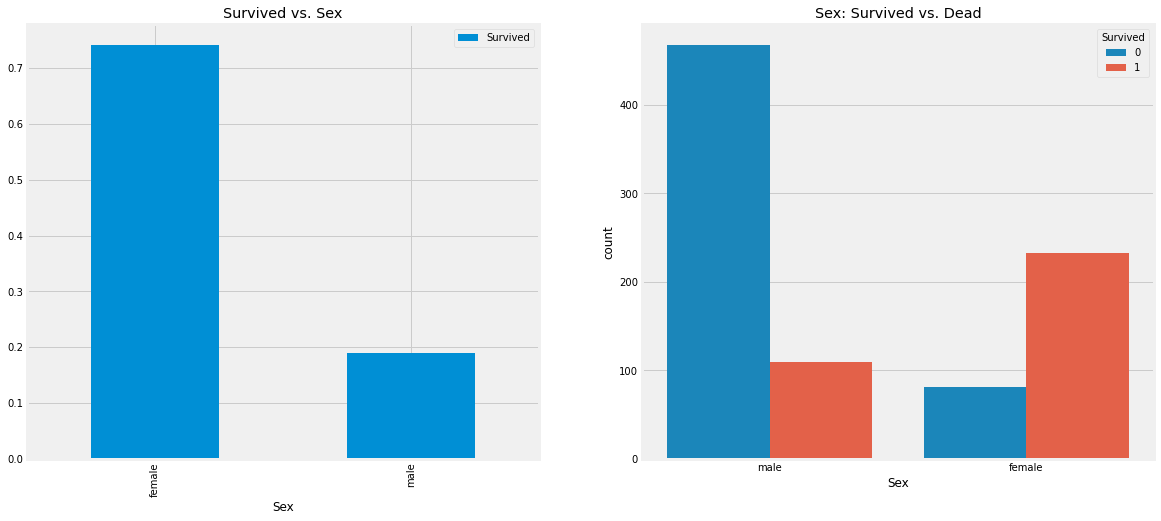

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')

plt.show()

> - 여자의 생존률이 굉장히 높음: `Sex`라는 feature이 모델에 중요한 변수처럼 보인다.

### Pclass (Ordinal)

In [13]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


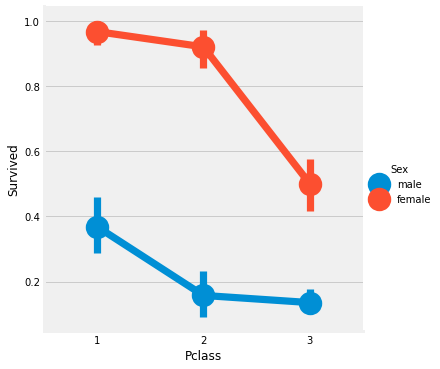

In [14]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

**FactorPlot**: 범주형 데이터를 쉽게 분리해 그릴 수 있음
> - Pclass1의 여자가 거의 95%

### Age (Continuous)

In [15]:
print('Oldest Passenger was of: ', data['Age'].max(), 'Years')
print('Youngest Passenger was of: ', data['Age'].min(), 'Years')
print('Average Age on the ship: ', data['Age'].mean(), 'Years')

Oldest Passenger was of:  80.0 Years
Youngest Passenger was of:  0.42 Years
Average Age on the ship:  29.69911764705882 Years


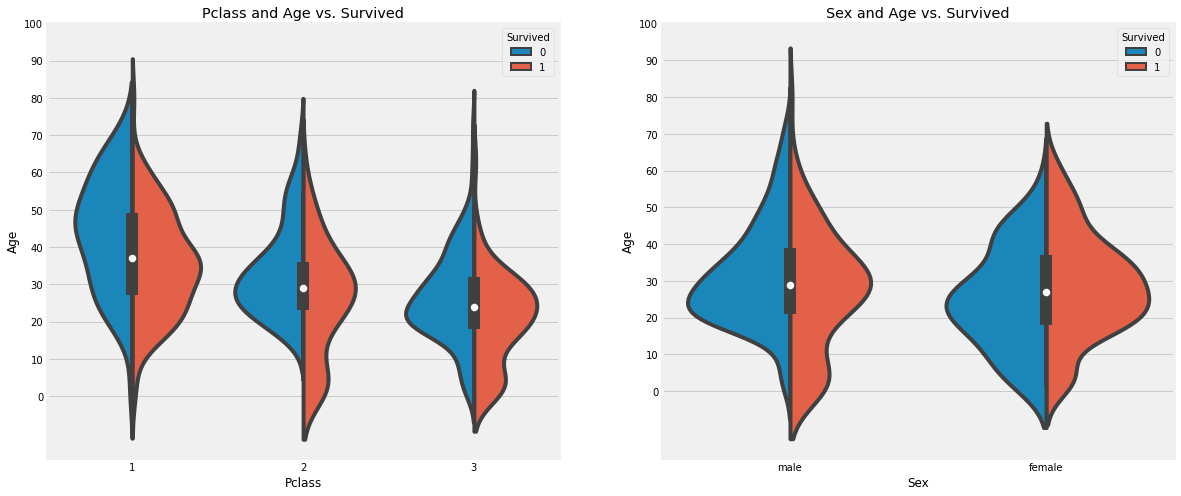

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

> - Pclass를 보면 age 10 아래 아이들의 생존률이 꽤 높다.
> - Pclass 1에서 여자의 생존률이 20-50세에 높음
> - 남자는 나이가 들수록 생존률이 낮아짐

### Age Null Data
- NaN을 단순히 평균으로 채워버리면 4살 아이와 29살에게 같은 나이를 부여함이 되는데 옳지 않다.
- `.`을 기준으로 Salutations 추출하기

In [17]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # extrcat Salutations

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [20]:
pd.crosstab(data['Initial'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


> `Mlle`, `Mmme`과 같은 Initial은 오타처럼 보인다.
> - replace하기

In [21]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [22]:
data.groupby('Initial')['Age'].mean() # average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [23]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [24]:
data.Age.isnull().any() # no null left

False

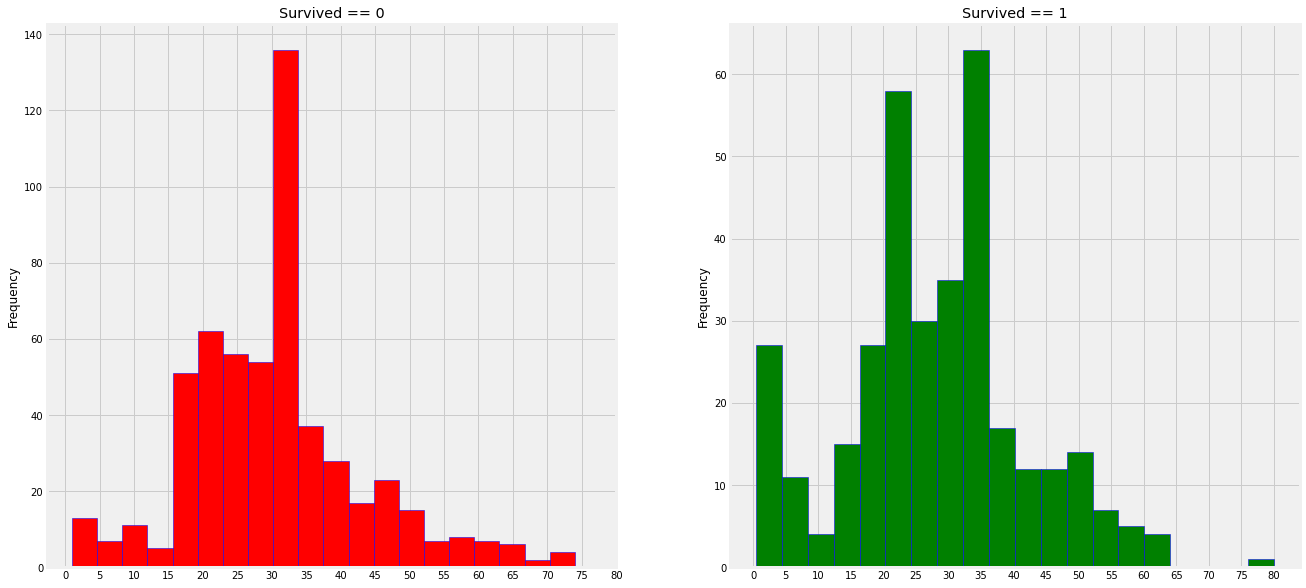

In [25]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='b', color='r')
ax[0].set_title('Survived == 0')
x1 = list(range(0, 85, 5)) # 굳이 list로 묶어주는 이유는?
# x1 = range(0, 85, 5)
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='b', color='g')
ax[1].set_title('Survived == 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

> - 5살 이하의 생존률이 높다.
> - 탑승자 중 가장 연장자(80세)는 생존자
> - 최대 사망자 수는 30~40세에 가장 많다.

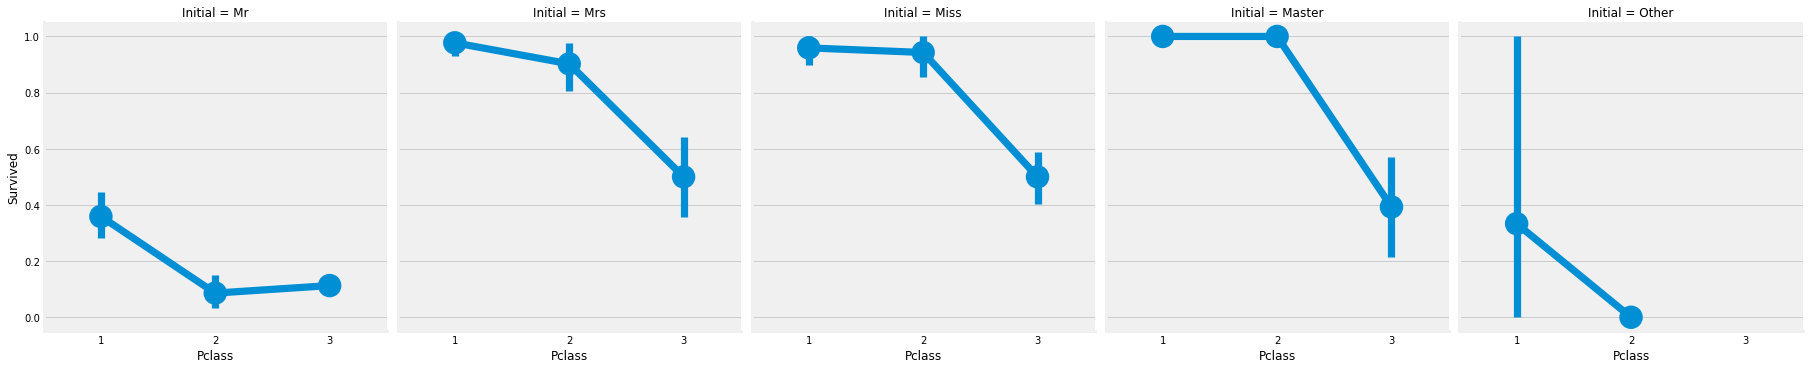

In [26]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

> - Mrs. Miss, Master(5)에서 생존률이 높은 것을 봐서 여자와 아이의 생존이 우선시된다.

### Embarked (Categorical)

In [27]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

In [28]:
pd.crosstab(data['Embarked'], data['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


### Chances for Survival by Port of Embarkation
- `gcf()`: 이미 생성된 figure를 대상으로 멤버 함수 호출하기

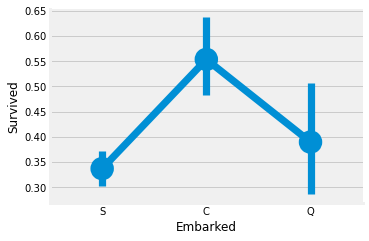

In [29]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

> `C` 항구의 생존률이 0.55 가량으로 가장 높고, `S`가 가장 낮다.

Text(0.5, 1.0, 'Embarked vs. Pclass')

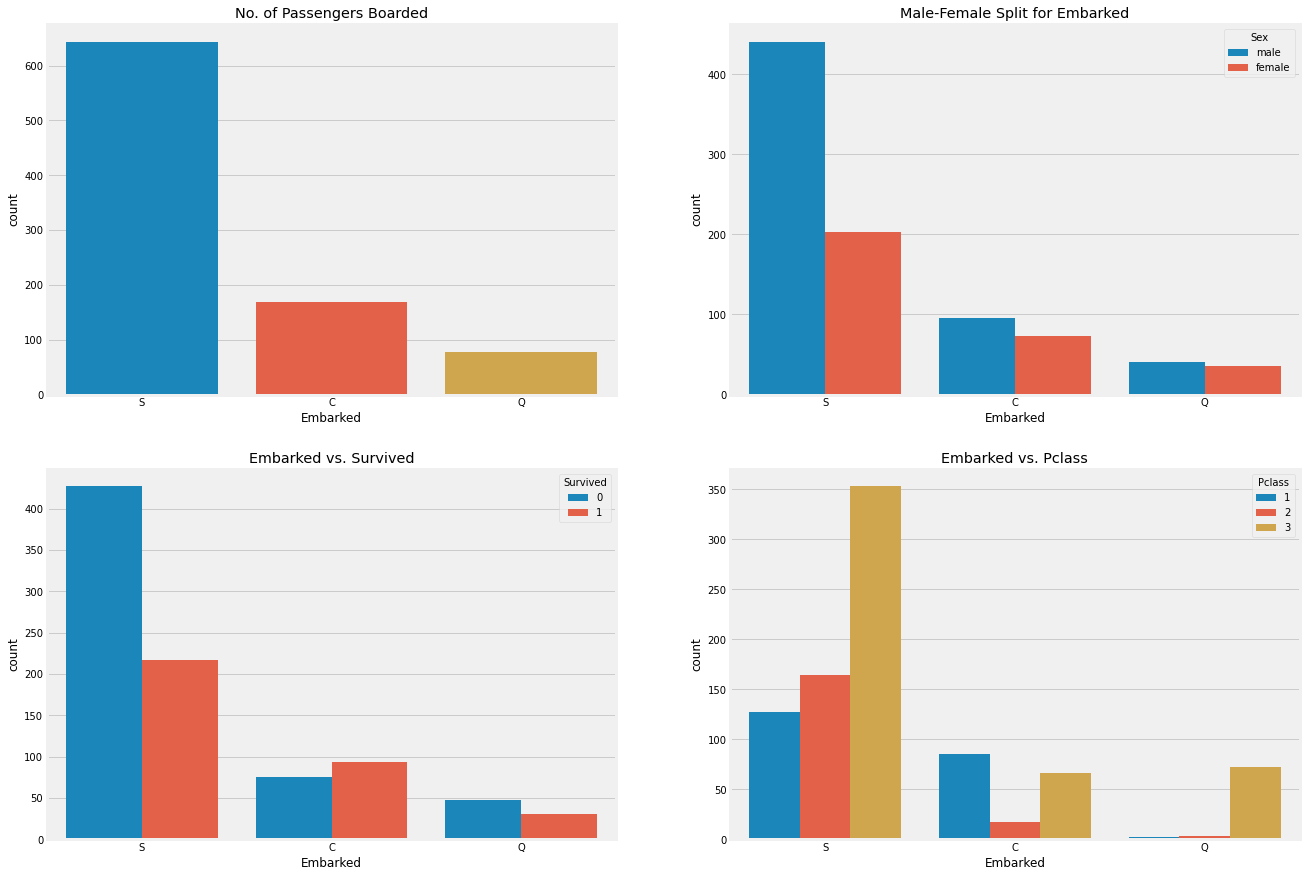

In [30]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs. Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs. Pclass')

> - 항구 `S`의 탑승자 수가 가장 많은데, 대부분 Pclass3 탑승자라고 판단된다.
> - `C`의 생존률이 가장 높아 보인다.
> - `S` 항구의 사망률이 가장 높은 것은 Pclass3의 대부분이 사망했기 때문
> - `Q` 항구는 거의 대부분이 Pclass3 탑승자였다.

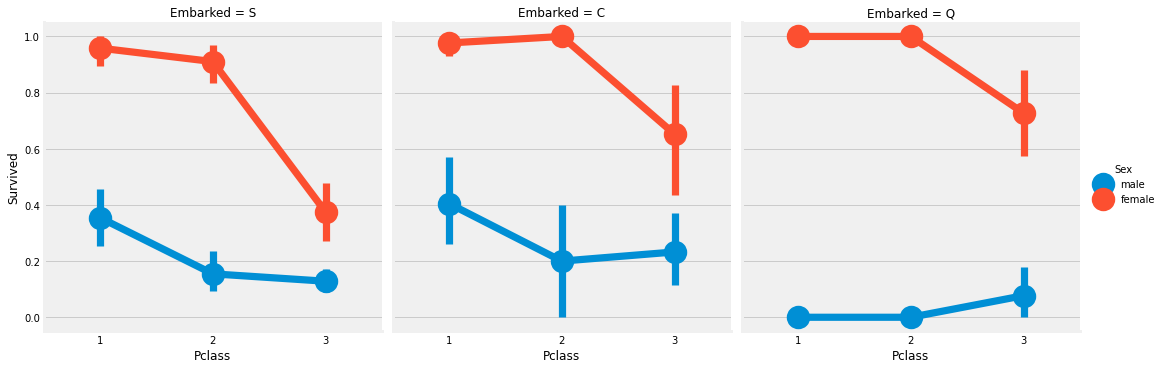

In [31]:
# Pclass별 사망자수
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

> - Pclass 1, Pclass 2에서 여자의 생존률은 거의 1에 가깝다.
> - `S` 항구: Pclass 3의 생존률 매우 낮음 - 돈의 영향이 있을 것이라 생각
> - `Q` 항구: 남자의 생존률 매우 낮음

### Filling Embarked NaN
`S` 항구의 탑승객이 가장 높았고, NaN 값이 있다면 `S`로 대체하자.

In [32]:
data['Embarked'].isnull().sum()

2

In [33]:
data['Embarked'].fillna('S', inplace=True)

In [34]:
data.Embarked.isnull().any() # no NaN values

False

### SibSip (Discrete)
- 형제 자매가 있는지, 가족 구성원이 있는지 나타냄
- Sibling: brother/sister/stepbrother/stepsister
- Spouse: husband/wife

In [35]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


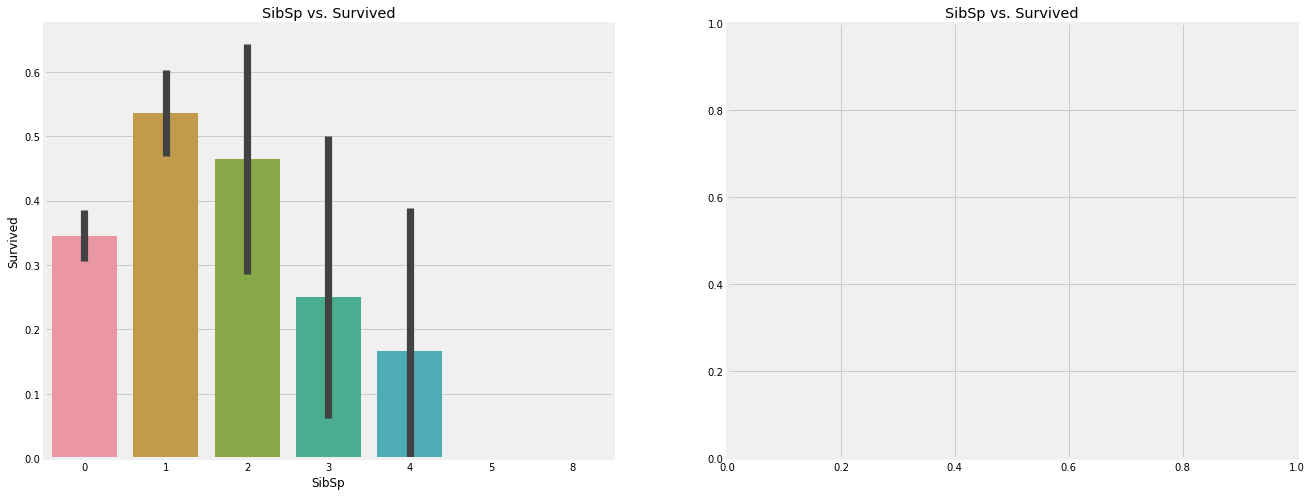

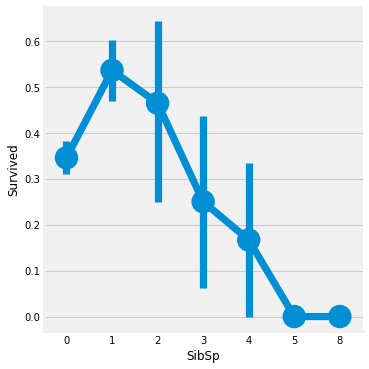

In [36]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs. Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs. Survived')

# plt.close(2)
plt.show()

-> `factorplot`이 subplot으로 그려지지 않는다 !!!!! <br/>
-> 이 대신 `pointpolot`으로 바꾸면 문제 해결
- factorplot은 figure-level이라 자기가 figure를 새로 하나 만드는데, 똑같이 생긴 pointplot은 axes-level이라 기존의 axes에 담기 때문에 문제가 없다. <br/>

[출처 블로그](https://blog.naver.com/PostView.naver?blogId=fbfbf1&logNo=222458265191&parentCategoryNo=37&categoryNo=54&viewDate=&isShowPopularPosts=false&from=postView)

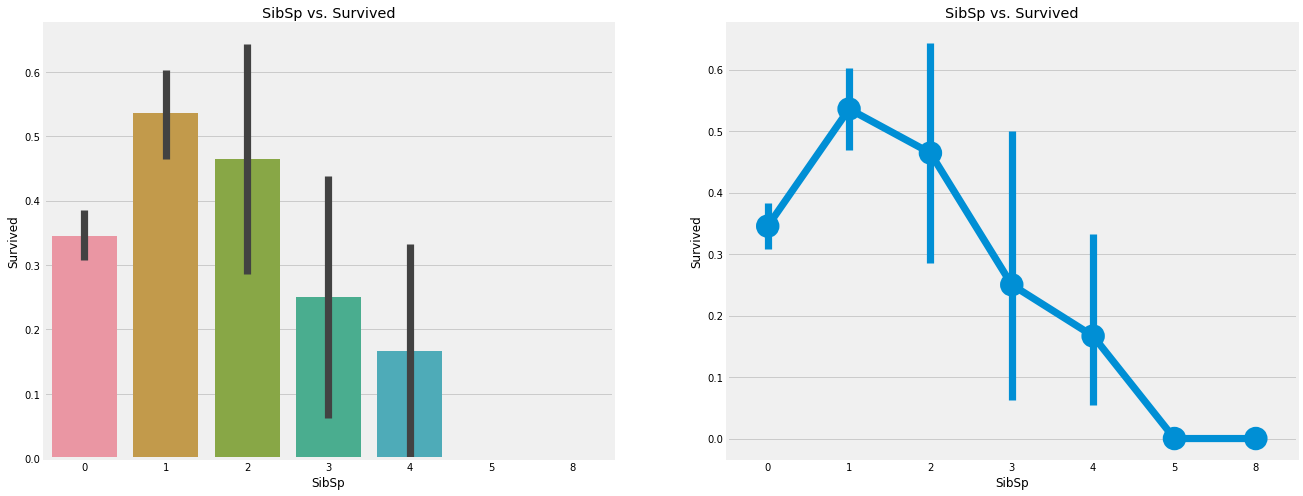

In [37]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs. Survived')

sns.pointplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs. Survived')

plt.close(2)
plt.show()

- SibSp가 없는 사람의 생존률은 약 34.5%이고, SibSp가 많을수록 생존률이 줄어든다.
- 당연할 것이, 내게 형제자매가 있다면 그들부터 save하게 할 것이다.
- 놀랍게도 가족 수가 5-8명 사이는 0%인데, 그 이유는 Pclass이라고 판단된다.

In [38]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7



-위 표에 따르면 SibSp가 4명 이상인 사람은 모두 Pclass 3에 존재한다. 이는 Pclass3에 탄 large family가 죽었다는 것을 보인다.

### Parch
: number of parents/children

In [39]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


> 위 crosstab에서도 Pclass 3에 large family가 탔음을 보인다.

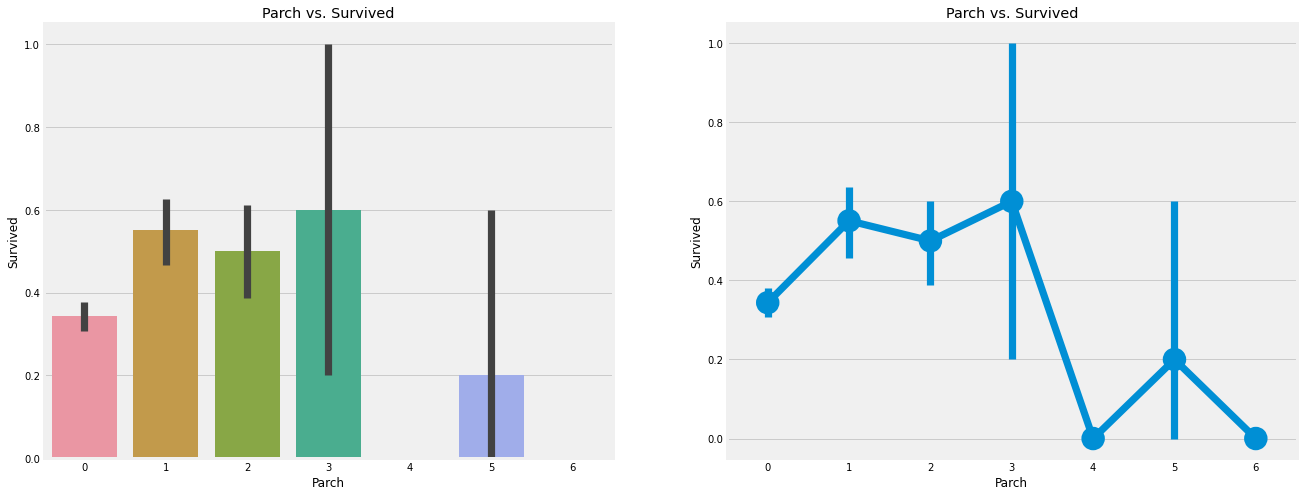

In [40]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs. Survived')

sns.pointplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs. Survived')

plt.close(2)
plt.show()

> - Parents가 있는 탑승객들의 생존률이 높지만 그 수가 늘 경우 생존률은 줄어든다.
> - 1-3명의 부모를 가진 경우 가장 생존률이 높고, 4명 이상이 되면 감소한다.

### Fare (Continous)

In [41]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


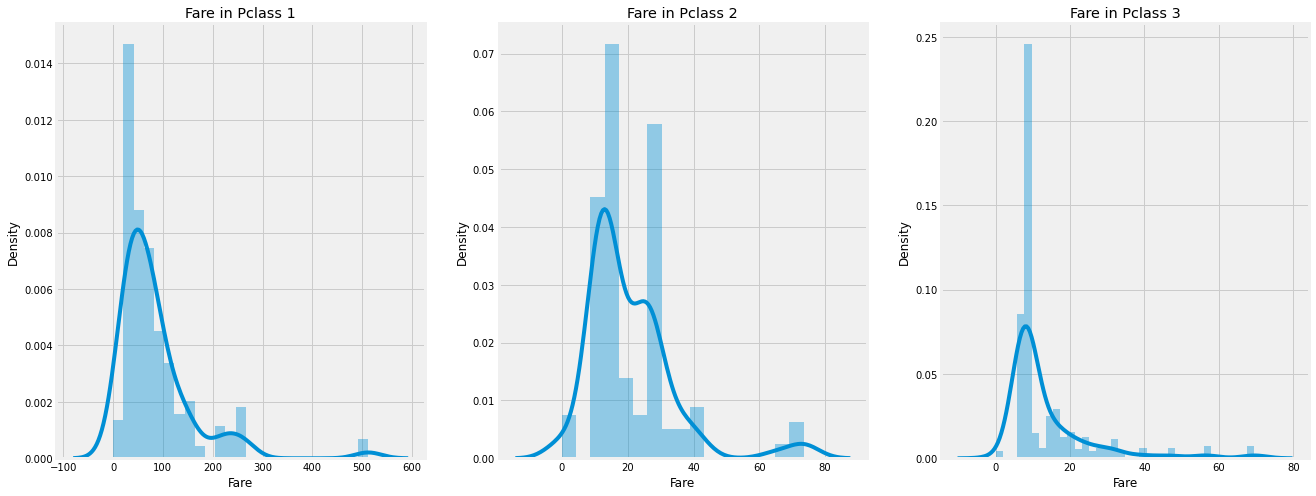

In [42]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fare in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fare in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fare in Pclass 3')

plt.show()

> Pclass 1의 경우 분포가 가장 크고, 보통 Fare가 늘수록 그 빈도수가 줄어든다.
> - continous feature이므로 binning을 통해 discrete values로 변경할 수 있다.

## - Observations in a Nutshell for all features
- **Sex**: 여자의 생존률이 높음

- **Pclass**: 1st class 의 생존률이 가장 높고, 3rd class의 생존률이 가장 낮음. 여자의 경우, 1st, 2nd class 생존률이 거의 1이다.

- **Age**: 5-10세 사이의 아이들에서 생존률이 가장 높고, 15-35세 탑승객의 사망률이 가장 높다.

- **Embarked**: C 탑승구의 생존률이 가장 높고, Q 항구는 거의 전부가 Pclass3의 사람이라고 판단된다.

- **Parch + SibSp** : 1-2명의 형제, 1-3명의 부모를 가졌을 때 생존률이 높다.

## Correlation between the Features
- `annot=True`: 숫자 적기

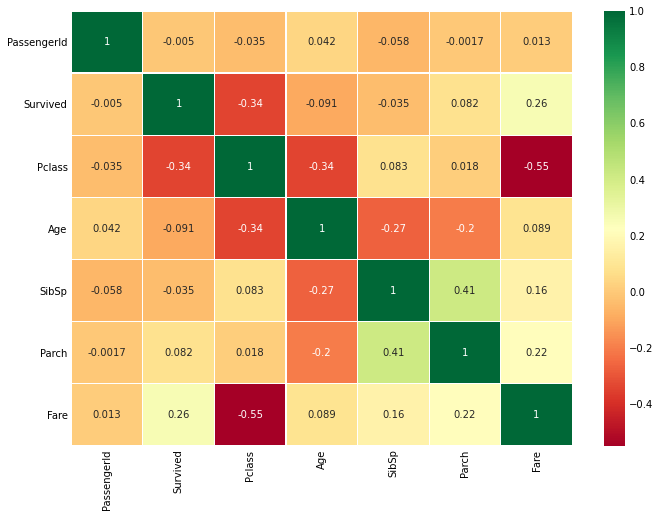

In [43]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

### Interpreting teh Heatmap
우린 오직 'numeric features'만 비교할 수 있다 !! <br/>
- 두 feature의 상관관계 값이 매우 높다면, 이는 서로서로 영향을 많이 미친다는 듯, 즉 그 중 하나는 필요하지 않다는 뜨시다.

위 heatmap을 보면 상관관계가 그리 높지 않고, **SibSp**와 **Parch**가 0.41로 제일 높다.

***

## 2. Feature Enginnering adn Data Cleansing
- redundant한 feature은 제거하고, 새로운 feature을 추가하는 과정

### Age_band
- problem: continous
> Binning이나 Normalization을 통해 categorical values로 바꾸어주자.

In [44]:
data['Age'].max(), data['Age'].min(), data['Age'].mean()

(80.0, 0.42, 29.841941638608304)

> 최대 나이는 80세이므로, 총 5개의 bins으로 나눠주자. <br/>
-> 한 bins당 크기는 16일 것

In [45]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [46]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


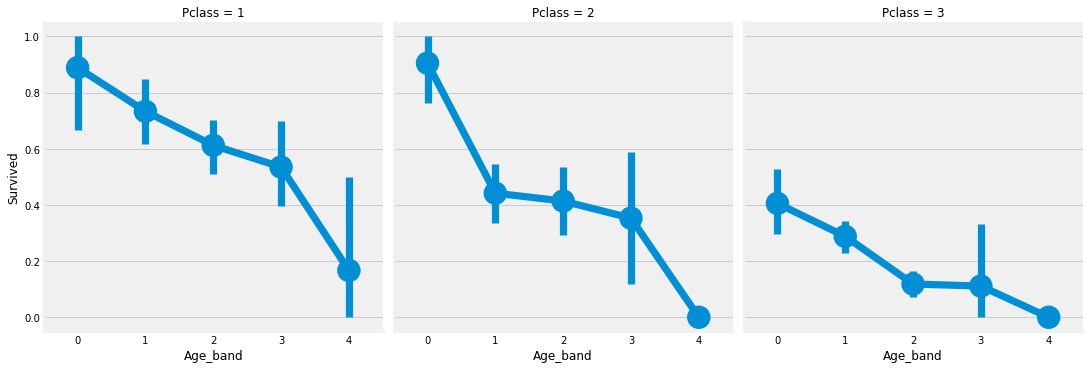

In [47]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

> 나이가 들수록 생존률이 낮아진다.

### Family_Size and Alone
- 새로운 feature인 Family_Size와 Alone 만들어 분석하기
- 이는 'Parch'와 'SibSp'의 summation이다.

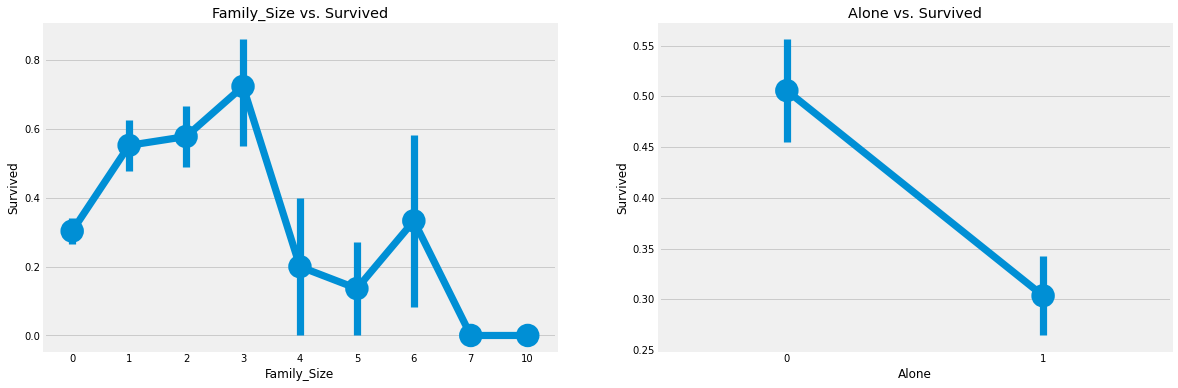

In [48]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] # Family size
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1 # Alone

f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.pointplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs. Survived')

sns.pointplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs. Survived')

plt.close(2)
plt.close(3)
plt.show()

> ❓ `plt.close(2)`, `plot.close(3)`의 의미?

> - Family_Size=0이 바로 Alone=1이라는 의미이다. 그래프를 보더라도 Family_Size가 0이거나 Alone일 경우 생존률은 매우 낮다.
> - Family_Size > 4일 경우에도 생존륭이 감소한다.
> - 이는 가족 수가 모델에서 중요한 feature임을 보여준다.

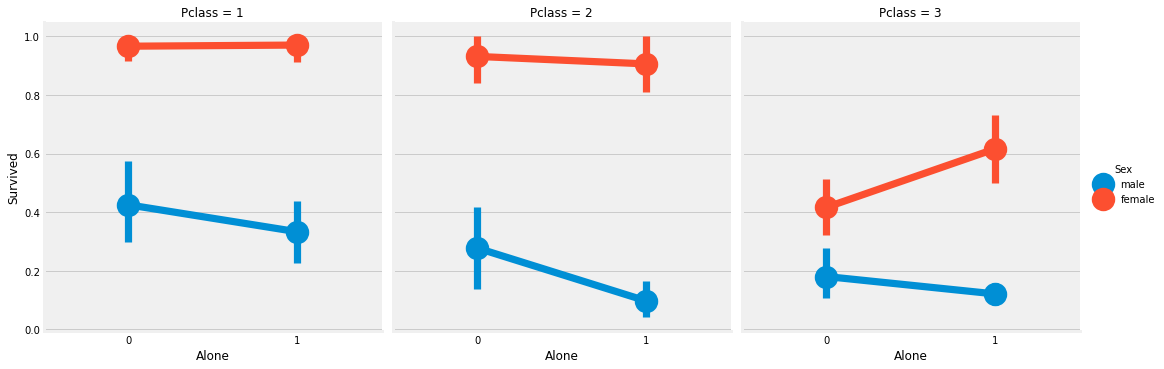

In [49]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

> Pclass3의 여자를 보면 혼자 있을 때 생존률이 높다. 이를 제외하면 모두 혼자이지 않을 때가 높다.

### Fare Range
**`pandas.qcut`**을 사용하자
- 위에서 나이를 5 bins로 나누었으니, 여기서도 5단계로 나누자.

In [50]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


> Fare가 올라갈수록 생존률도 높아진다.
> - 우리는 이를 Age_Band처럼 singleton value로 바꿀 것이다.

In [51]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454),'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31),'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513),'Fare_cat'] = 3

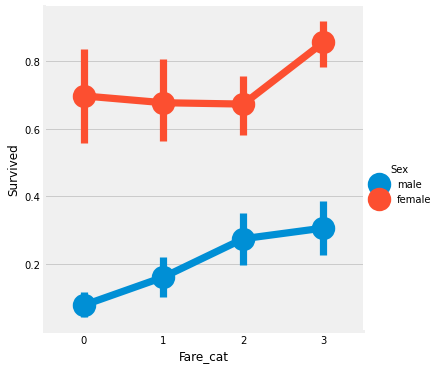

In [52]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

> 남자와 여자 모두 Fare이 오를수록 Survival도 오른다. (여자는 좀 아닌듯?!)

### Converting String Values into Numeric
String(Sex, Embarked, etc...) 변수를 Numeric 변수로 바꿔주자

In [53]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

#### Dropping UnNeeded Features
**Name** -> x need <br/>
**Age** -> we have Age_band <br/>
**Ticket** -> random string <br/>
**Fare** -> we have Fare_cat <br/>
**Cabin** -> a lot on NaN <br/>
**Fare_Range** -> we have Fare_cat <br/>
**PassengerId** -> x categorized

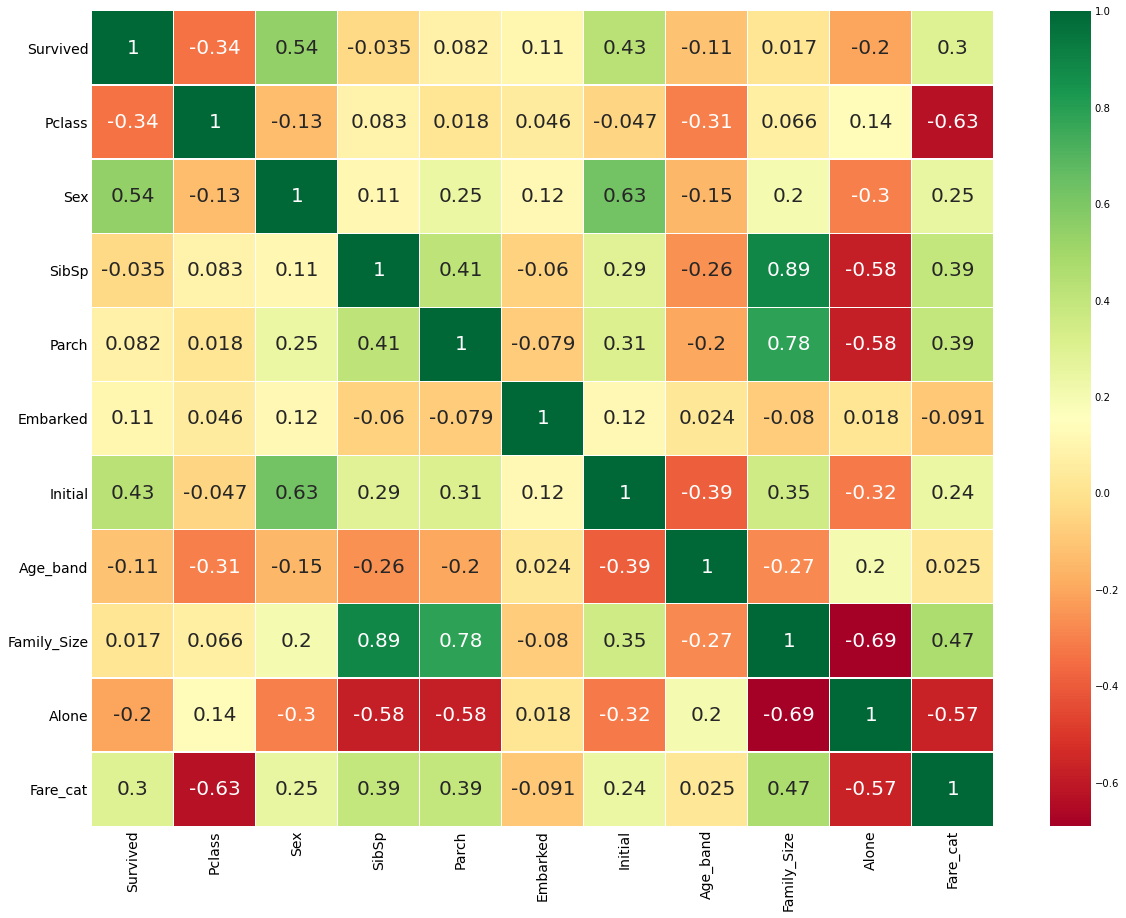

In [54]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
fig = plt.gcf() # 현재 figure 객체 구하기
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

SibSp & Family_Size, Parch & Family_Size는 양의 상관관계가, Alone & Family_Size, Fare_cat & Pclass는 음의 상관관계가 높다. (매우 그럴듯 해보임)

***
## 3. Predictive Modeling

여러 분류 알고리즘을 이용해 passenger가 survive할지 아닐지 예측할 것이다.

1. Logistic Regression
2. Support Vector Machines (Linear or radial)
3. Random Forest
4. K-Nearest Neighbors
5. Naive Bayes
6. Decision Tree
7. Logistic Regression

In [55]:
# Import all the required ML plcakges
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [56]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
y = data['Survived']

> `stratify`: 분류 문제를 다룰 때 target 값을 지정해줌으로써 `target의 class 비율을 유지` 한 채로 데이터셋을 split함
> - [참조](https://dacon.io/competitions/open/235698/talkboard/404894?page=1&dtype=recent)

### Radial Support Vector Machines (rbf-SVM)

In [57]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)

print('Accuracy for rbf-SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf-SVM is  0.835820895522388


**SVM**
- 분류에 사용되는 지도학습 머신러닝 모델
- 서포트 벡터(Support Vector)를 사용해 결정 경계(Decision Boundary)를 정의하고, 분류되지 않은 점을 '결정 경계와 비교'해 분류하게 됨
- 고차원 or 무한 차원의 공간에서 초평면(의 집합)을 찾아 이를 이용해 분류/회귀를 진행

**커널**
- 데이터셋에 비선형성 특성을 추가하면 선형 모델을 더 강력하게 만들 수 있음
- 커널 기법: 새로운 특성을 만들지 않고, 고차원 분류기를 학습시킬 수 있도록 함
- 주어진 데이터를 고차원 특징 공간으로 사상해, 원래의 차원에서 보이지 않던 선형(초평면)이 데이터를 분류할 수 있도록 함
- ex) 가우시안 커널, RBF(Radial Basis Function) 커널

**SVM의 튜닝**
- gamma변수와 C변수를 조절해 튜닝이 이루어짐
- gamma: 하나의 훈련 샘플이 미치는 영향의 범위 결정
- C: 각 포인트의 중요도를 제한하는 매개변수로, 해당 값이 커질수록 결정 경계가 데이터에 정확하게 맞춰짐

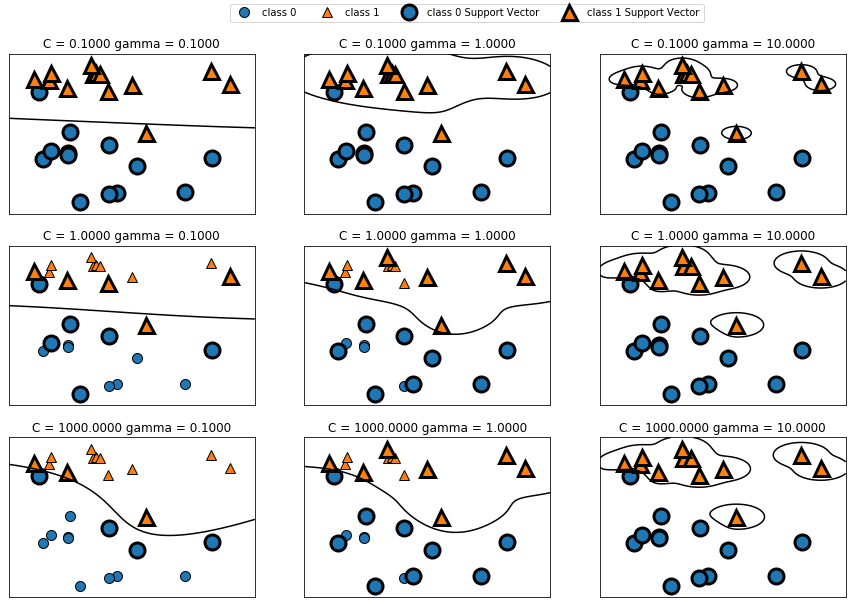

(출처: https://inuplace.tistory.com/600)

### Linear Support Vector Machine (linear-SVM)

In [58]:
model = svm.SVC(kernel='linear', C=0.01, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)

print('Accuracy for linear-SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear-SVM is  0.8208955223880597


- linear보단 rbf 커널이 정확성 더 좋음!

### Logistic Regression
: 데이터가 어떤 범주에 속할 확률을 0-1의 값으로 예측하고, 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘

In [59]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)

print('The accuracy of the Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is  0.8134328358208955


### Decision Tree

In [60]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)

print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is  0.8022388059701493


### K-Nearest Neighbours(KNN)
- 비슷한 특성을 가진 데이터는 비슷한 범주에 속하는 경향이 있다.
- 주변에 `가장 가까운 K개`의 데이터를 보고 데이터가 속할 그룹을 판단하는 알고리즘
- k는 홀수로 설정하는 것이 좋으며, 일반적으로 총 데이터 수의 제곱근 값을 사용한다.

In [61]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)

print('The accuracy of the KNN is ', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is  0.832089552238806


- KNN에서 값(n_neighbours)들을 바꾸면서 정확성을 판별해보자.
    - default: 5

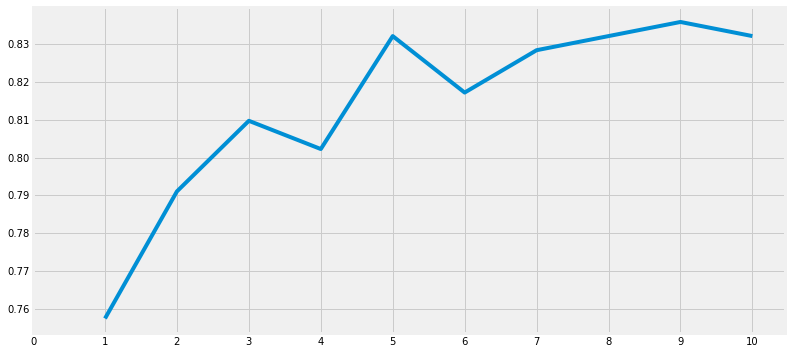

Accuracy for different values of n are:  [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max values ad  0.835820895522388


In [62]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf() # 현재 figure 객체 구하기
fig.set_size_inches(12, 6)
plt.show()
print('Accuracy for different values of n are: ', a.values, 'with the max values ad ', a.values.max())

### Gaussian Naive Bayes
**나이브 베이즈** <br/>
: 확률 기반 머신러닝 분류 알고리즘
- 데이터를 나이브(단순)하게 모든 사건을 `독립적인 사건`으로 가정하고, 이 독립 사건들을 베이즈 이론에 대입시켜 가장 높은 확률의 레이블로 분류를 실행하는 알고리즘
- 베이즈 이론: $P(A|B) = {P(B|A) P(A)} / {P(B)}$


- 설명 변수가 연속형 변수일 때: 가우시안 나이브 베이즈
- 설명 변수가 범주형 변수일 때: 다항 나이브 베이즈 <br/>
(범주가 2개밖에 없는 이진형일 때: 베르누이 나이브 베이즈)

<br/>

**가우시안 나이브 베이즈** <br/>
: 표본 평균과 표본 분산을 가진 정규분포 하에서 베이즈 정리를 사용한 것 <br/>
- 정규분포를 가진 표본들을 대상으로 `조건부 독립`을 나타내, 항상 같은 분모를 갖는 조건 하에 분자의 값이 값이 큰 경우 (확률이 가장 높은 경우)를 '선택'하는 것

In [63]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)

print('The accuracy of the NaiveBayes is ', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is  0.8134328358208955


### Random Forests

In [64]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)

print('The accuracy of the Random Forests is ', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is  0.8246268656716418


모델의 정확도가 분류 모델의 '강건함'을 좌우하는 only 요인이 될 수 없다.
- 만약 분류기가 학습되어 테스트 데이터에 대한 정확도가 90%라고 해보자.
- 정확도가 매우 좋아보이지만 과연 모든 새로운 test set에 대해 항상 90%가 넘게 나올까?
- The answer is no. 왜냐면 분류기는 자기 자신을 train으로 쓸 것이기 때문이다.
- train과 test data가 계속해서 바뀌면서 정확도도 바뀔 것이다.
- **model variance** -> generalized model인 **Cross Validation** 사용하기

즉, 고정된 test set을 통해 모델의 성능을 검증/수행하는 과정을 반복하면, 결국 내가 만든 모델은 test set에만 잘 동작하는 모델이 될 것이다.
- 이를 해결하고자 하는 것이 바로 교차 검증 (Cross Validation)
- train set을 train set + validation set으로 분리한 뒤, validation set을 사용해 검증하는 방식

### Cross Validation
- 만약 data가 imbalance하다면 우린 데이터셋에 대해 평균을 내서 사용해야 할 것이다.

`K-Fold Cross Validation` <br/>
1. 데이터셋을 k개(폴드)로 나눈자.
2. 만약 k=5라고 하면, 1 파트를 test로, 나머지 4 파트를 train으로 둔다.
3. 매 반복마다 이 test 파트를 바꾸면서 과정을 반복한다. 정확도와 에러는 평균을 낸다.
4. 알고리즘은 때때로 train 데이터에 대해 overfitting or underfitting이 될 것인데 Cross validtion은 이를 방지한다.

> cross_val_score() 수행 후, 반환 값은 scoring 파라미터로 지정된 측정 값을 배열 형태로 반환함
> - X: feature 데이터셋
> - y: label 데이터 셋
> - cv: 교차 검증 폴드 수
> - scoring: 예측 성능 평가 지표

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=22, shuffle=True) # 10개의 fold로 나눔
xyz = [] # 평균
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'SVM', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy') # 값이 총 10개씩 존재
    cv_result = cv_result # Why?
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
SVM,0.808140,0.040287
Decision Tree,0.804732,0.047106
Naive Bayes,0.795843,0.054861
Random Forest,0.809263,0.042580


<AxesSubplot:>

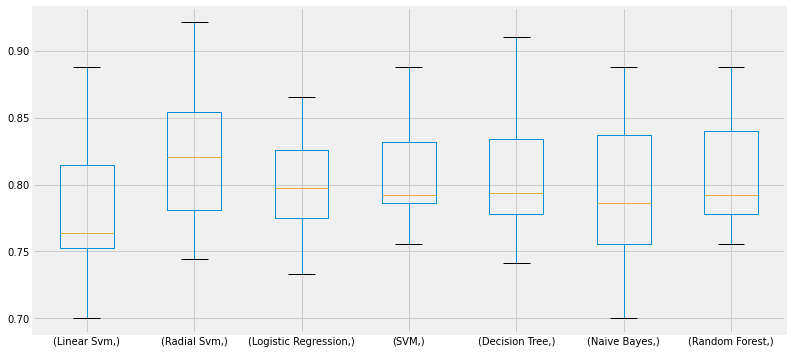

In [66]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

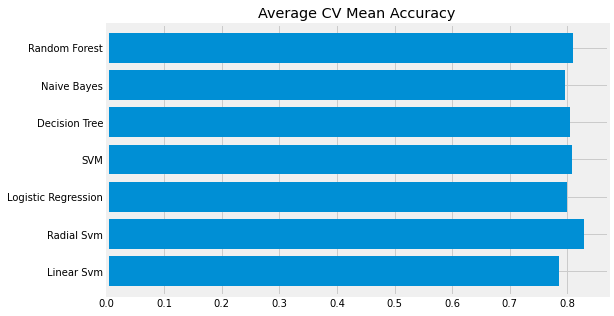

In [67]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

- Classification accuracy는 때때로 imbalance로 인해 문제를 보일 수 있다.
- confusion matrix를 통해 요약된 결과(어떤 모델이 잘못 되었는지 / 잘못 예측 했는지)를 나타내자.

### Confusion Matrix
- correct / incorrect classifications의 수를 준다.

> `cross_val_predict`: 교차 검증을 통해 얻은 예측

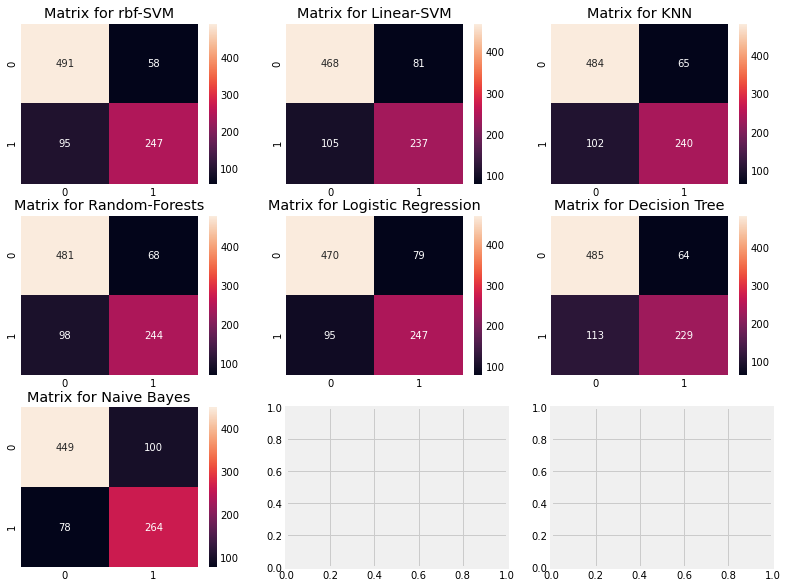

In [68]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

- 왼쪽 대각선은 올바른 예측을, 오른쪽 대각선은 잘못된 예측을 보여준다.

1. correct predictions: 491(dead)+247(survived) -> (491+247)/891 = 82.8%
2. 58명의 살았는데 죽었다고, 95명의 죽었는데 살았다고 잘못 분류된 사람들의 수

- 위 표를 보면 rbf-SVM이 죽은 사람 예측(0, 0)을 가장 잘 하는 것을 알 수 있다.
- 반면 Naive Bayes는 산 사람 예측(1, 1)을 가장 잘 한다.

### Hyper-Parameters Tuning
- 머신러닝은 블랙박스같이 여러 default parameters는 존재하지만, 더 좋은 모델을 만들기 위해 tune 하거나 바꿀 수 있다.
- SVM에서 C나 gamma같은 것을 hyper-parameters라 불리고, learning rate를 바꿀 수도 있다.
- 우린 2가지 best classifier를 위한 하이퍼파라미터를 튜닝할 텐데, SVM과 RandomForests를 이용하자.
- **GridSearchCV**

> - `estimator`: classifier, regressor, pipeline 등
> - `param_grid`: 튜닝을 위해 파라미터, 사용될 파라미터를 dictionary 형태로 만들어 넣음
> - `scoring`: 예측 성능을 측정할 평가 방법, 보통 accuracy 지정해 정확도 평가함
> - `verbose`: 탐색 과정에서 출력되는 메시지의 양 결정 (0-3 으로 갈수록 자세한 메시지 출력)

### SVM

In [69]:
from sklearn.model_selection import GridSearchCV

C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5 ,0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel': kernel, 'C': C, 'gamma': gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, y)

print(gd.best_score_) # 최고의 점수
print(gd.best_estimator_) # 최적의 파라미터 값 출력

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


### Random Forests

In [70]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


> - SVM: C=0.4, gamma=0.1 (82.82%)
> - RandomForest: n_estimators=300, random_state=0 (81.93%)

### Ensembling
- 앙상블은 정확성과 성능을 높이는데 좋은 방법 중 하나이다.
- 여러 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
1. Voting Classifier
2. Bagging
3. Boosting

### Voting Classifier
- 여러 간단한 머신러닝 모델들을 합치는 가장 단순한 방법
- 서로 다른 알고리즘을 가진 분류기를 결합
- 평균 prediction을 준다.

> - `hard voting`: 다수결 원칙. 예측한 결괏값들 중 다수의 분류기가 예측한 예측값을 최종 보팅 결괏값으로 선정
> - `soft voting`: 분류기들의 레이블 값 결정 확률을 모두 더해 평균을 내 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

In [71]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                                ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                                ('LR', LogisticRegression(C=0.05)),
                                                ('DT', DecisionTreeClassifier(random_state=0)),
                                                ('NB', GaussianNB()),
                                                ('svm', svm.SVC(kernel='linear', probability=True))],
                                   voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is: ', ensemble_lin_rbf.score(test_X, test_Y))

cross = cross_val_score(ensemble_lin_rbf, X, y, cv=10, scoring='accuracy')
print('The cross validated score is ', cross.mean())

The accuracy for ensembled model is:  0.8246268656716418
The cross validated score is  0.8249188514357053


### Bagging
- 비슷한 classifier의 예측들을 평균 취하기
- 평균을 취하기 때문에 분산을 줄일 수 있다.
- Voting과 다른점: 각각의 분류기가 모두 같은 유형의 classifier를 이용한다.

### Bagged KNN
- Bagging은 높은 분산을 가질 때 잘 동작한다.
- ex) Decision Tree, RandomForest
- `n_neighbors`를 이용해 KNN을 사용할 수 있다.

In [72]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                          random_state=0,
                          n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is: ', metrics.accuracy_score(prediction, test_Y))

result = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is: ', result.mean())

The accuracy for bagged KNN is:  0.835820895522388
The cross validated score for bagged KNN is:  0.8160424469413232


### Bagged DecisionTree

In [73]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is: ', metrics.accuracy_score(prediction, test_Y))

result = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is: ', result.mean())

The accuracy for bagged Decision Tree is:  0.8208955223880597
The cross validated score for bagged Decision Tree is:  0.8171410736579275


### Boosting
: 여러 개의 분류기가 순차적으로 학습을 수행하되, 예측이 틀린 데이터에 대해 올바르게 예측하도록 가중치를 부여하며 학습과 예측 진행
- 여러 개의 약한 학습기를 순차적으로 학습/예측을 하며 잘못 예측한 데이터에 가중치를 부여해 오류를 개선해나가는 학습 방식
<br/>

- sequential한 classifier들의 앙상블 기법
- 처음엔 complete dataset에 대해 훈련을 받고, 일부 틀린 예시들을 가질 것이다.
- 그러면 다음 번 반복에서 틀리게 예상한 예시들에 더 가중치를 두고, 올바르게 예측할 것이다.
- 이 과정이 반복되면서 정확성이 최대한으로 늘 때까지 새 분류기가 이용될 것이다.

> AdaBoost & GradientBoost의 차이점
> - GradientBoost: 가중치 업데이트를 **경사 하강법**을 이용해 한다.

### AdaBoost (Adaptive Boosting)
- 예측 성능이 조금 낮은 weak classifier를 다량 구축 및 조합해 가중치 수정을 통해 좀 더 나은 성능을 발휘하는 하나의 strong classifier를 합성하는 방법의 알고리즘
- 약한 분류기의 실수를 통해 가중치를 반복적으로 수정하고 결합하여 정확도를 높일 수 있으며 학습 데이터에 overfitting 현상이 적게 발생해 예측 성능을 저하하지 않는 장점이 있다.
<br/>

- 이 경우 weak learner가 바로 Decision Tree이다.
- 하지만 우린 default base_estimator를 변경할 것이다.

In [74]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is: ', result.mean())

The cross validated score for AdaBoost is:  0.8249188514357055


### Stochastic Gradient Boosting
- AdaBoost와 유사하게 동작하지만 가중치 업데이트 방식이 경사 하강법(Gradient descent)을 사용하는 것

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is: ', result.mean())

The cross validated score for Gradient Boosting is:  0.8115230961298376


### XGBoost
- GBM의 속도 문제를 해결하기 위해 모델 성능에 초점을 맞춘다.
- 병렬 처리 사용으로 속도와 정확도가 빠르다.
- GBM과 달리 overfitting 방지를 위해 변수에 regularized를 사용한다.

In [73]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
# ! brew install libomp

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/services).
==> New Formulae
aarch64-elf-binutils                     licensefinder
aarch64-elf-gcc                          lighthouse
abi-compliance-checker                   lilypond
abi-dumper                               lima
abricate                                 linode-cli
acl                                      linux-headers@4.15
actionlint                               linux-headers@5.16
age                                      liqoctl
airspyhf                                 lit
alda                                     litani
alembic                                  llvm@12
alerter                                  locust
all-repos                                ltex-ls
alpscore                                 lua-language-server
amfora                                   luau
ansilove                                 lunzip
apache-pulsar                            ly
apt                


==> Downloading https://ghcr.io/v2/homebrew/core/libomp/manifests/14.0.0
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/libomp/blobs/sha256:e66d2009d6d
==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
######################################################################## 100.0%
==> Pouring libomp--14.0.0.monterey.bottle.tar.gz
🍺  /usr/local/Cellar/libomp/14.0.0: 7 files, 1.6MB
==> `brew cleanup` has not been run in the last 30 days, running now...
Disable this behaviour by setting HOMEBREW_NO_INSTALL_CLEANUP.
Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
Removing: /Users/yeon/Library/Caches/Homebrew/gdbm--1.19... (208.9KB)
Removing: /Users/yeon/Library/Caches/Homebrew/icu4c--69.1... (27.2MB)
Removing: /Users/yeon/Library/Caches/Homebrew/lz4--1.9.3... (244.4KB)
Removing: /Users/yeon/Library/Caches/Homebrew/mitmproxy--6.0.2_2... (7.0MB)
Removing: /Users/yeo

In [76]:
import xgboost as xg

xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is: ', result.mean())

[09:10:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:10:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:11:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:11:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

- AdaBoost에서 가장 높은 정확성을 보였다.
- Hyper-Parameter Tuning을 해보며 정확성을 늘려보자.

### Hyper-Parameter Tuning for AdaBoost

In [77]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}

gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 110 candidates, totalling 550 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


- AdaBoost에서 최대 정확도는 n_estimators=100, learning_rate=0.1일 때

### Confusion Matrix for the Best Model

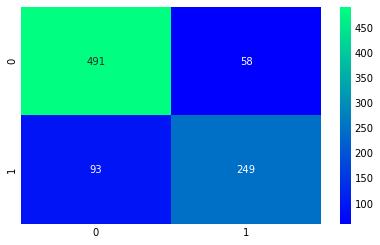

In [78]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result = cross_val_predict(ada, X, y, cv=10)
sns.heatmap(confusion_matrix(y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

### Feature Importance

[09:20:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


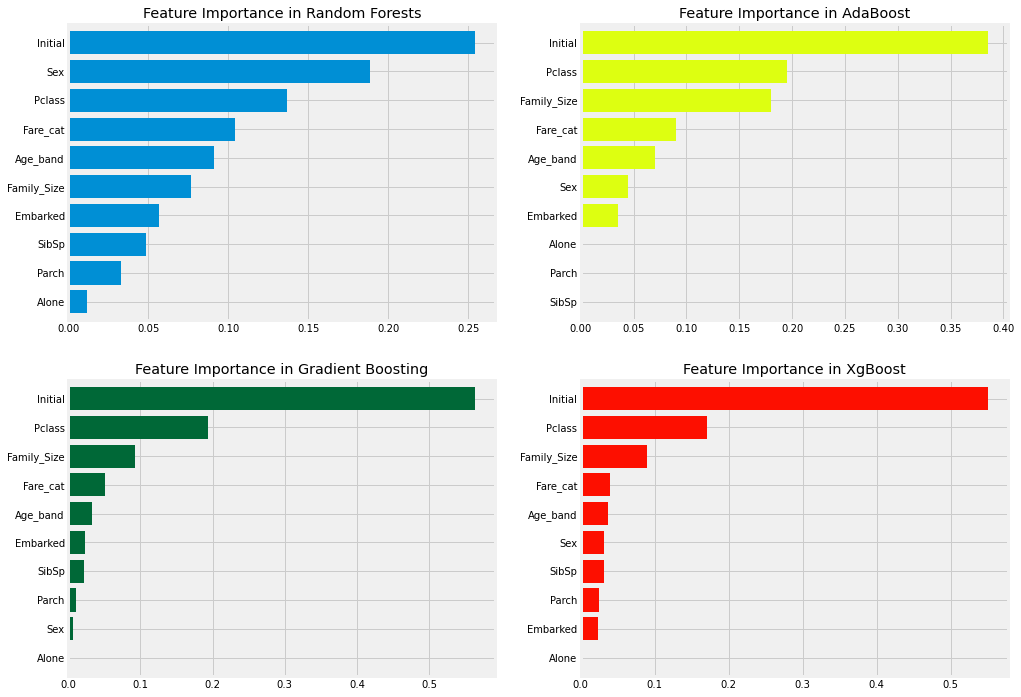

In [82]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))

model = RandomForestClassifier(n_estimators=500, random_state=0) # Why 500?
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color='#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap='RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], color='#FD0F00')
ax[1, 1].set_title('Feature Importance in XgBoost')
plt.show()
